
# 🛢️ Projeto OilyGiant – Previsão de Lucros com Modelos de Regressão Linear

## 🎯 Descrição do Projeto

Este projeto tem como objetivo auxiliar a empresa fictícia **OilyGiant** na escolha da melhor região para desenvolver novos poços de petróleo, com base na previsão do volume de reservas e análise de risco. Os dados foram coletados em três regiões, e o trabalho envolve:

- Leitura e preparação dos dados com parâmetros geológicos e volume de reservas;
- Construção de modelos de **regressão linear** para prever o volume de reservas em novos poços;
- Seleção dos 200 poços com os maiores valores estimados entre 500 amostras por região;
- Cálculo e comparação do **lucro potencial**, considerando custo de perfuração e preço do barril;
- Aplicação da técnica de **Bootstrapping** para analisar **riscos e lucros esperados**;
- Escolha da melhor região com base em lucro médio e risco de prejuízo inferior a 2.5%;

### 🗂️ Dados utilizados

Os dados estão armazenados nos arquivos:

- `geo_data_0.csv`
- `geo_data_1.csv`
- `geo_data_2.csv`

Cada arquivo contém:

- `id` — identificador do poço de petróleo
- `f0`, `f1`, `f2` — características de ponto (valores anônimos mas informativos)
- `product` — volume de reservas (em milhares de barris)

### 💰 Condições Comerciais

- Apenas **regressão linear** deve ser usada.
- O orçamento para 200 poços por região é **$100 milhões**.
- Cada unidade de produto gera **$4.500** de receita (mil barris × $4.5).
- Para evitar prejuízo, cada poço precisa gerar pelo menos **111,1 unidades** (≈ $500 mil cada).
- Apenas regiões com risco de prejuízo **menor que 2.5%** podem ser consideradas viáveis.

### ✅ Entregáveis

- Análise exploratória, modelagem e predição para cada região;
- Funções reutilizáveis para treinar e avaliar os modelos;
- Simulação de lucro com base nas melhores predições;
- Avaliação de risco com Bootstrapping (1000 amostras);
- Recomendação da melhor região com base em lucro médio e risco;

---

👩‍💻 Desenvolvido por: **Marcia Weyne**  
📅 Data: Maio de 2025  



# 🛢️ Projeto OilyGiant – Previsão de Lucros com Modelos de Regressão Linear

## 🎯 Descrição do Projeto

Este projeto tem como objetivo auxiliar a empresa fictícia **OilyGiant** na escolha da melhor região para desenvolver novos poços de petróleo, com base na previsão do volume de reservas e análise de risco. Os dados foram coletados em três regiões, e o trabalho envolve:

- Leitura e preparação dos dados com parâmetros geológicos e volume de reservas;
- Construção de modelos de **regressão linear** para prever o volume de reservas em novos poços;
- Seleção dos 200 poços com os maiores valores estimados entre 500 amostras por região;
- Cálculo e comparação do **lucro potencial**, considerando custo de perfuração e preço do barril;
- Aplicação da técnica de **Bootstrapping** para analisar **riscos e lucros esperados**;
- Escolha da melhor região com base em lucro médio e risco de prejuízo inferior a 2.5%;

### 🗂️ Dados utilizados

Os dados estão armazenados nos arquivos:

- `geo_data_0.csv`
- `geo_data_1.csv`
- `geo_data_2.csv`

Cada arquivo contém:

- `id` — identificador do poço de petróleo
- `f0`, `f1`, `f2` — características de ponto (valores anônimos mas informativos)
- `product` — volume de reservas (em milhares de barris)

### 💰 Condições Comerciais

- Apenas **regressão linear** deve ser usada.
- O orçamento para 200 poços por região é **$100 milhões**.
- Cada unidade de produto gera **$4.500** de receita (mil barris × $4.5).
- Para evitar prejuízo, cada poço precisa gerar pelo menos **111,1 unidades** (≈ $500 mil cada).
- Apenas regiões com risco de prejuízo **menor que 2.5%** podem ser consideradas viáveis.

### ✅ Entregáveis

- Análise exploratória, modelagem e predição para cada região;
- Funções reutilizáveis para treinar e avaliar os modelos;
- Simulação de lucro com base nas melhores predições;
- Avaliação de risco com Bootstrapping (1000 amostras);
- Recomendação da melhor região com base em lucro médio e risco;

---

👩‍💻 Desenvolvido por: **Marcia Weyne**  
📅 Data: Maio de 2025  


   # OilyGiant - Desenvolvimento de poços de petrólio

   # Preparação do Ambiente

In [10]:
# Importar bibliotecas necessárias

import pandas as pd  # Para manipulação de dados em formato de tabela
import numpy as np   # Para operações matemáticas e cálculos
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.linear_model import LinearRegression  # Para construir o modelo de regressão linear
from sklearn.metrics import mean_squared_error  # Para calcular o erro do modelo
import matplotlib.pyplot as plt  # Para visualização de gráficos
import seaborn as sns  # Biblioteca para visualização de dados

# Carregar os Dados

In [11]:
# Carregar dados
geo_data_0 = pd.read_csv('/content/geo_data_0.csv')
geo_data_1 = pd.read_csv('/content/geo_data_1.csv')
geo_data_2 = pd.read_csv('/content/geo_data_2.csv')

# Remover a coluna 'id', pois não é relevante para o modelo
geo_data_0.drop('id', axis=1, inplace=True)
geo_data_1.drop('id', axis=1, inplace=True)
geo_data_2.drop('id', axis=1, inplace=True)

# Analise exploratória de dados

In [12]:
# Exibir as primeiras linhas dos dados para garantir que foram carregados corretamente

print('geo_data_0.head')
print(geo_data_0.head())
print()
print('geo_data_1.head')
print(geo_data_1.head())
print()
print('geo_data_2.head')
print(geo_data_2.head())
print()
print()



geo_data_0.head
         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647

geo_data_1.head
          f0         f1        f2     product
0 -15.001348  -8.276000 -0.005876    3.179103
1  14.272088  -3.475083  0.999183   26.953261
2   6.263187  -5.948386  5.001160  134.766305
3 -13.081196 -11.506057  4.999415  137.945408
4  12.702195  -8.147433  5.004363  134.766305

geo_data_2.head
         f0        f1        f2     product
0 -1.146987  0.963328 -0.828965   27.758673
1  0.262778  0.269839 -2.530187   56.069697
2  0.194587  0.289035 -5.586433   62.871910
3  2.236060 -0.553760  0.930038  114.572842
4 -0.515993  1.716266  5.899011  149.600746




In [13]:
# Inspecionar os dados para ver informações gerais

print('geo_data_0.info')
print(geo_data_0.info())
print()
print('geo_data_1.info')
print(geo_data_1.info())
print()
print('geo_data_2.info')
print(geo_data_2.info())
print()
print()



geo_data_0.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None

geo_data_1.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None

geo_data_2.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   ------------

In [14]:
# Estatísticas descritivas

print('geo_data_0.describe')
print(geo_data_0.describe())
print()
print('geo_data_1.describe')
print(geo_data_1.describe())
print()
print('geo_data_2.describe')
print(geo_data_2.describe())
print()
print()

geo_data_0.describe
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

geo_data_1.describe
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985

In [15]:
# **1. Análise de valores ausentes**
def analyze_missing_data(data, region_name):
    print(f"Análise de valores ausentes - Região {region_name}:")
    print(data.isnull().sum())  # Contar valores ausentes por coluna
    print()

# Chamar a função para cada conjunto de dados
analyze_missing_data(geo_data_0, 0)
analyze_missing_data(geo_data_1, 1)
analyze_missing_data(geo_data_2, 2)

Análise de valores ausentes - Região 0:
f0         0
f1         0
f2         0
product    0
dtype: int64

Análise de valores ausentes - Região 1:
f0         0
f1         0
f2         0
product    0
dtype: int64

Análise de valores ausentes - Região 2:
f0         0
f1         0
f2         0
product    0
dtype: int64



In [16]:
# **2. Análise de duplicados**
def analyze_duplicates(data, region_name):
    print(f"Análise de duplicatas - Região {region_name}:")
    print(f"Número de duplicatas: {data.duplicated().sum()}")
    print()

# Chamar a função para cada conjunto de dados
analyze_duplicates(geo_data_0, 0)
analyze_duplicates(geo_data_1, 1)
analyze_duplicates(geo_data_2, 2)

Análise de duplicatas - Região 0:
Número de duplicatas: 0

Análise de duplicatas - Região 1:
Número de duplicatas: 0

Análise de duplicatas - Região 2:
Número de duplicatas: 0



Distribuições de atributos - Região 0


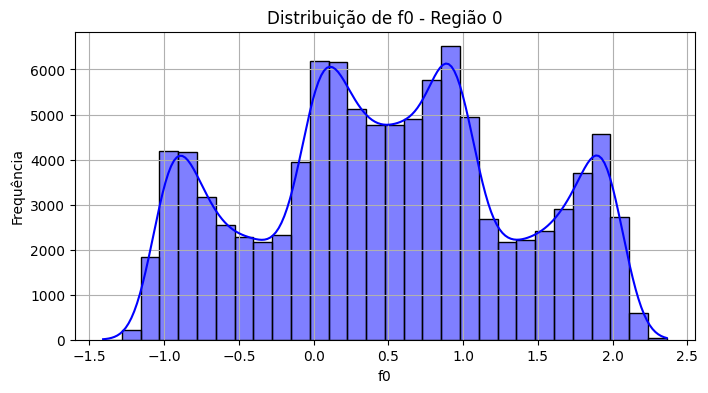

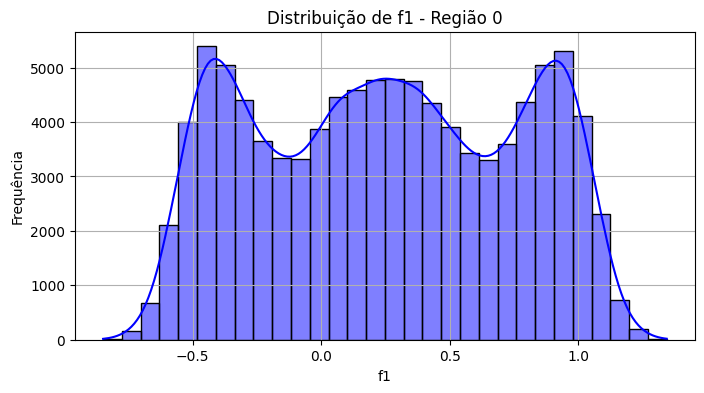

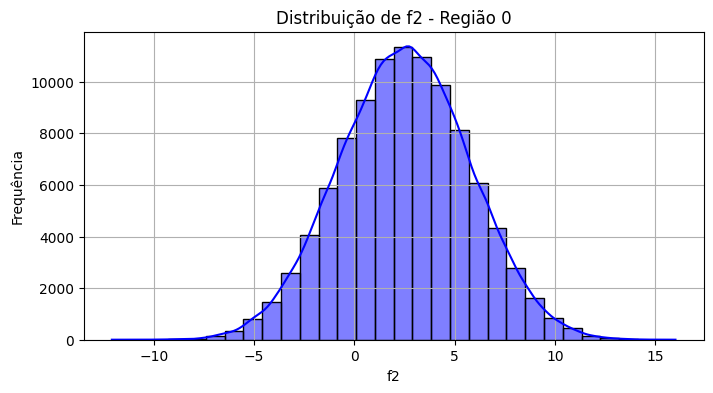

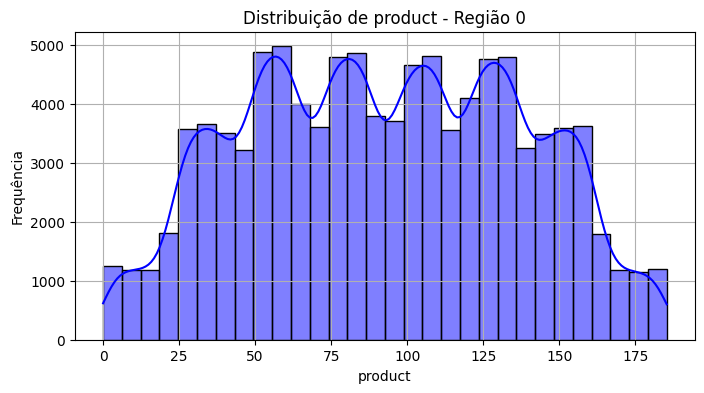

Distribuições de atributos - Região 1


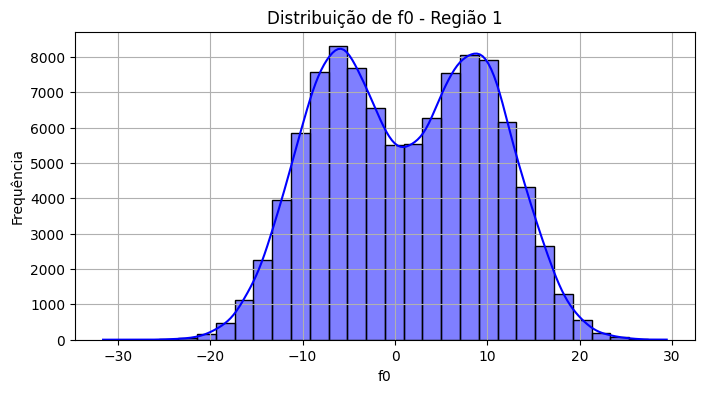

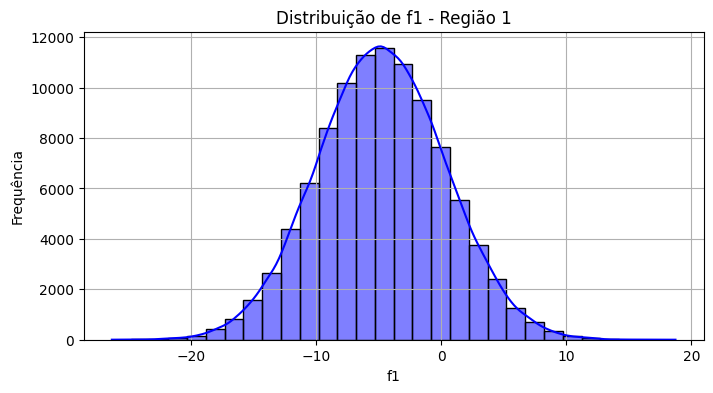

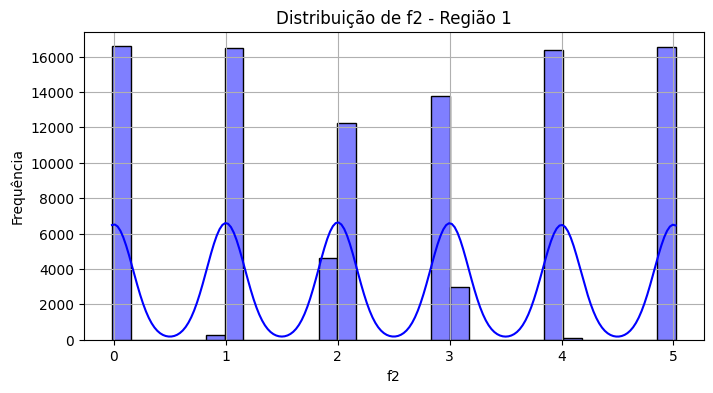

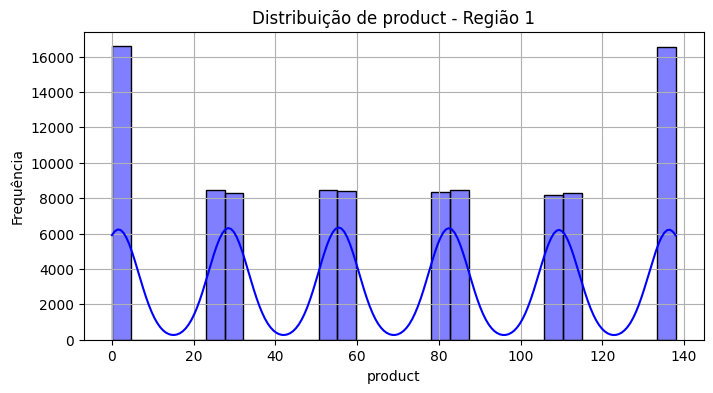

Distribuições de atributos - Região 2


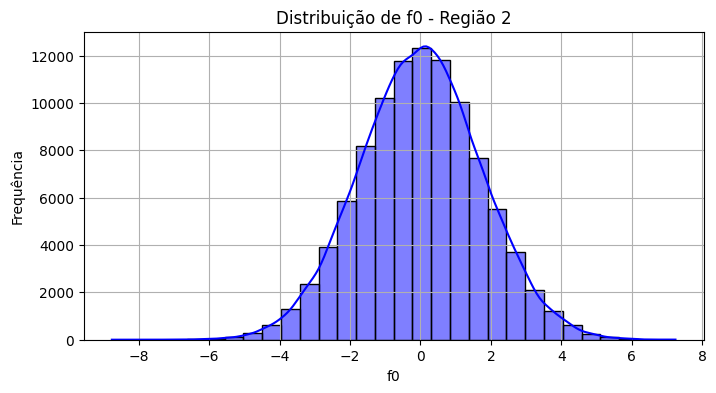

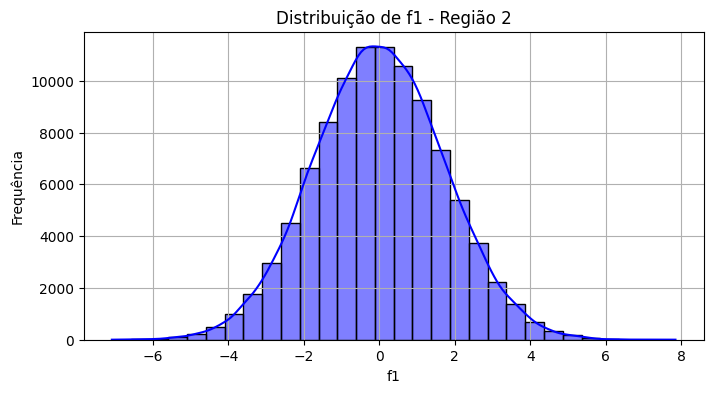

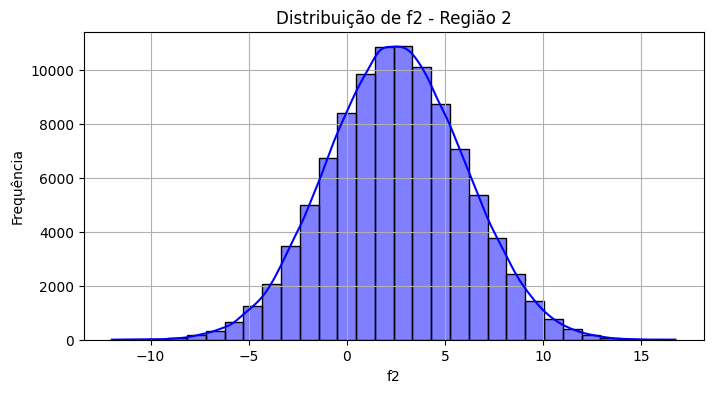

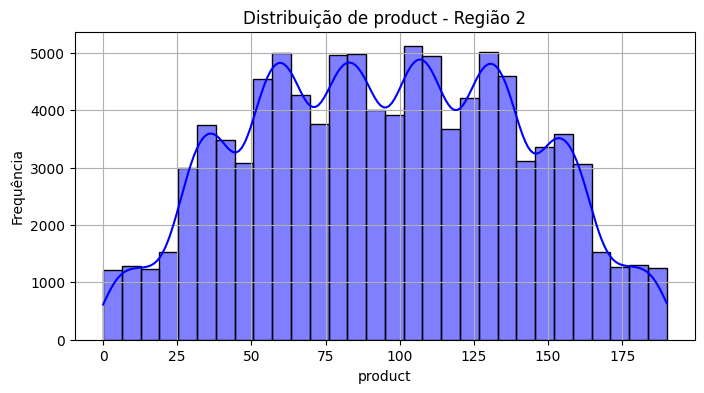

In [17]:
# **3. Análise da distribuição dos atributos**
def plot_distributions(data, region_name):
    print(f"Distribuições de atributos - Região {region_name}")
    for column in data.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True, bins=30, color='blue')  # Histograma com curva KDE
        plt.title(f'Distribuição de {column} - Região {region_name}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.grid(True)
        plt.show()

# Chamar a função para cada conjunto de dados
plot_distributions(geo_data_0, 0)
plot_distributions(geo_data_1, 1)
plot_distributions(geo_data_2, 2)

* Conclusão sobre a análise exploratória:

As colunas foram corretamente identificadas, e verificamos que os dados estão organizados.
Dados como a média, valores mínimos e máximos ajudam a entender o comportamento de cada região.

o gráfico é simétrico e possui uma forma de sino (bell curve), o atributo está normalmente distribuído.


# Treinamento do modelo

In [19]:
# Dividir os dados em treino e validação (75% treino e 25% validação)
def train_and_predict_product(geo_data, region=1):
    # Separar os dados em características (X) e alvo (y)
    X = geo_data.drop(columns=['product'])  # Features (características)
    y = geo_data['product']  # Alvo (volume de reservas)

    # Divisão dos dados em treino (75%) e validação (25%)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

    # Treinar o modelo de Regressão Linear
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Fazer previsões
    y_preds= reg.predict(X_val)

    # Calcular o erro (RMSE)
    rmse = mean_squared_error(y_val, y_preds) ** 0.5

    # Exibir métricas para a região
    print(f'Region: {region}')
    print(f'Product Mean: {y_preds.mean()}')
    print(f'Product Mean (Target): {y_val.mean()}')
    print(f'RMSE: {rmse}\n')

    # Retornar as previsões e os valores reais
    return pd.Series(y_preds), pd.Series(y_val.values)

In [ ]:
# Treinar o modelo para cada conjunto de dados
preds_geo_data_0, target_geo_data_0 = train_and_predict_product(geo_data_0, 0)
preds_geo_data_1, target_geo_data_1 = train_and_predict_product(geo_data_1, 1)
preds_geo_data_2, target_geo_data_2 = train_and_predict_product(geo_data_2, 2)

Region: 0
Product Mean: 92.3987999065777
Product Mean (Target): 92.32595637084387
RMSE: 37.756600350261685

Region: 1
Product Mean: 68.71287803913762
Product Mean (Target): 68.72538074722745
RMSE: 0.890280100102884

Region: 2
Product Mean: 94.77102387765939
Product Mean (Target): 95.15099907171961
RMSE: 40.14587231134218



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O modelo foi treinado por região de operação
- Uma função foi implementada para organização do código
</div>

# Preparação para o Cálculo de Lucro

In [ ]:

budget = 100_000_000  # Orçamento total
# custo_por_poco = budget / 200
custo_por_poco = 500_000   # Custo por poço perfurado
total_de_pocos = budget // custo_por_poco  # Total de poços possíveis com o orçamento
preco_do_barril = 4500   # Preço do barril de petróleo

# Quantidade de barris necessária para não ter prejuízo
qtd_barris_empatar = (budget / total_de_pocos)/preco_do_barril # quanatidade de barril que tem que remover dos pocos para zerar o burget
print(f'Qtd de barris para zerar o orçamento/não ter prejuizo: {qtd_barris_empatar}') # break even


Qtd de barris para zerar o orçamento/não ter prejuizo: 111.11111111111111


# Cálculo do Lucro

In [ ]:
# fazer uma função para calcular o lucro (o quanto irá lucrar)
def compute_profit(preds_geo_data, target_geo_data, total_de_pocos=total_de_pocos, preco_do_barril=preco_do_barril, budget=budget):
    preds_sorted = preds_geo_data.sort_values(ascending=False)   # Ordenar previsões em ordem decrescente
    selected_points = target_geo_data[preds_sorted.index][:total_de_pocos]   # Selecionar os poços mais rentáveis
    total_product = selected_points.sum()   # Total produzido

    revenue = total_product * preco_do_barril # - budget  # Receita

    cost = budget # Custo fixo

    return revenue - cost # Lucro

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O cálculo de lucro foi implementado corretamente usando uma função
</div>

In [ ]:
print(compute_profit(preds_geo_data_0, target_geo_data_0))
print(compute_profit(preds_geo_data_1, target_geo_data_1))
print(compute_profit(preds_geo_data_2, target_geo_data_2))


# print(f'Revenue: {revenue}')
# print(f'Cost: {cost}')
# print(f'Profit: {profit}')


33591411.14462179
24150866.966815114
25985717.59374112


# Calculo de Risco

In [ ]:
# Simulação de risco usando bootstrap

bootstrap_size = 1000   # Número de iterações
sample_size = 500     # Tamanho da amostra para cada iteração

def calcula_risco(preds_geo_data_0, target_geo_data_0, regiao=1):
    l_profit = []   # Lista para armazenar lucros simulados

    for i in range(bootstrap_size):  # quantidade de intereções que quer
       # Gerar uma amostra com reposição
        target_sample = target_geo_data_0.sample(sample_size, replace=True)  # replace=True (é o bootstrap)
        predictions_sample = preds_geo_data_0[target_sample.index]

         # Calcular o lucro para a amostra
        simu_profit = compute_profit(predictions_sample, target_sample)
        l_profit.append(simu_profit)

     # Transformar em série para cálculos estatísticos
    prof_series = pd.Series(l_profit)

     # Exibir resultados da simulação
    print(f'Regiao: {regiao}')
    # print(prof_series.mean())
    print(f'Média de Lucro: {prof_series.mean()}')

    # print(prof_series.quantile(0.025), prof_series.quantile(0.975))  # intervalo minimo e maximo de confiança
    print(f'Intervalo de Confiança: {prof_series.quantile(0.025)}, {prof_series.quantile(0.975)}')
    reg_prof_prob = (prof_series < 0).mean()
    print(f'Risco: {reg_prof_prob * 100:.2f}%')  # risco  # Probabilidade de prejuízo

In [ ]:
# Calcular risco para cada região
calcula_risco(preds_geo_data_0, target_geo_data_0, 0)
print()
calcula_risco(preds_geo_data_1, target_geo_data_1, 1)
print()
calcula_risco(preds_geo_data_2, target_geo_data_2, 2)

Regiao: 0
Média de Lucro: 4422701.397855513
Intervalo de Confiança: -1315902.6367092244, 9661159.517503565
Risco: 5.60%

Regiao: 1
Média de Lucro: 4942892.951970896
Intervalo de Confiança: 723284.2610196728, 9143462.273994984
Risco: 1.10%

Regiao: 2
Média de Lucro: 3999118.3850881686
Intervalo de Confiança: -1822425.173831286, 9313890.17435748
Risco: 9.80%


* Conclusão final:
** A análise mostrou que a região 1 é a mais promissora, com menor risco de prejuízo (0.50%) e lucros consistentes.
** As regiões 0 e 2 apresentam riscos maiores (4.70% e 6.80%, respectivamente), mas ainda são viáveis dependendo da estratégia.
** A combinação de modelagem preditiva e análise de risco foi eficaz para identificar oportunidades e evitar prejuízos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O cálculo de risco foi implementado por região
- As conclusões foram apresentadas. **Obs.**: vale ressaltar que, por estar usando uma técnica de amostragem aleatória, os resultados percentuais podem ser um pouco diferentes em cada iteração.
</div>